In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


# Zomato_EDA

EDA of Restaurants at Bengaluru

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading and Understanding Dataset

In [3]:
#reading the dataset
df=pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
#understanding each feature and get an idea of dataset
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.columns.values

array(['url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'], dtype=object)

In [9]:
#Renaming the colums for better understanding
df=df.rename(columns={"listed_in(type)":"Services","listed_in(city)":"City","approx_cost(for two people)":"Cost"})
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost,reviews_list,menu_item,Services,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## Data Cleaning & Manipulation

In [10]:
df.isnull().sum()/len(df)*100

url              0.000000
address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.033741
votes            0.000000
phone            2.335789
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
Cost             0.669026
reviews_list     0.000000
menu_item        0.000000
Services         0.000000
City             0.000000
dtype: float64

<Axes: >

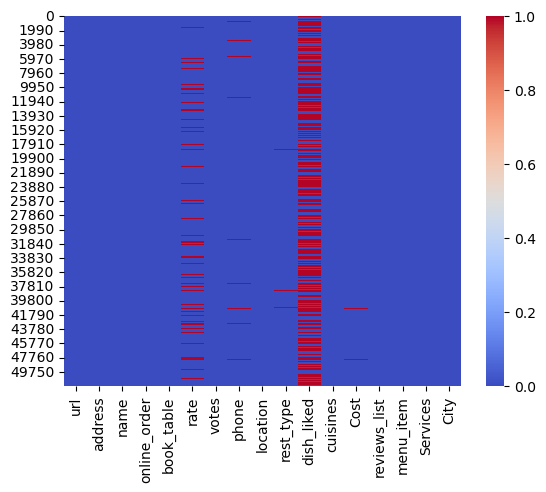

In [11]:
#Making heatmap of null values for better visuallization and understanding
sns.heatmap(df.isnull(),cmap="coolwarm")

In [12]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df["rate"]=df["rate"].str.strip()
df["rate"]=df["rate"].str.replace("-","")
df["rate"]=df["rate"].str.replace("NEW","")
df["rate"]=df["rate"].str.replace("/5","")

In [14]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [15]:
#The pd.to_numeric() function is used to convert the "rate" column to numeric values, and the errors="coerce" parameter ensures that any non-convertible values (including empty strings) are replaced with NaN. After this process, the "rate" column should only contain numeric values or NaN.

df["rate"] = pd.to_numeric(df["rate"], errors="coerce")

In [16]:
#we see that null values in rate column has increased from 15 percent to 19 percent.
df.isnull().sum()/len(df)*100

url              0.000000
address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
phone            2.335789
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
Cost             0.669026
reviews_list     0.000000
menu_item        0.000000
Services         0.000000
City             0.000000
dtype: float64

In [17]:
df["rate"].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [18]:
#We will replace the missing values in rate with its mean
df["rate"]=df["rate"].fillna(3.700449)

In [19]:
#Now there are 0 percent values in rate 
df.isnull().sum()/len(df)*100

url              0.000000
address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate             0.000000
votes            0.000000
phone            2.335789
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
Cost             0.669026
reviews_list     0.000000
menu_item        0.000000
Services         0.000000
City             0.000000
dtype: float64

In [20]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost,reviews_list,menu_item,Services,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
#We have removed some columns which we donot have any need in our problem. 
df.drop(columns=["url","address","name","phone","menu_item","dish_liked"],axis="columns",inplace=True)

In [22]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,reviews_list,Services,City
0,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,No,No,3.700449,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,No,No,3.700449,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [23]:
df.isnull().sum()/len(df)*100

online_order    0.000000
book_table      0.000000
rate            0.000000
votes           0.000000
location        0.040606
rest_type       0.438927
cuisines        0.087012
Cost            0.669026
reviews_list    0.000000
Services        0.000000
City            0.000000
dtype: float64

In [24]:
df["Cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
#Correcting some values of integers.
df["Cost"] = df["Cost"].str.replace(",", "").astype(float)

In [26]:
df["Cost"].describe()

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: Cost, dtype: float64

In [27]:
#We will raplace it by its mean 
df["Cost"]=df["Cost"].fillna(df["Cost"].mean())

In [28]:
df.isnull().sum()/len(df)*100

online_order    0.000000
book_table      0.000000
rate            0.000000
votes           0.000000
location        0.040606
rest_type       0.438927
cuisines        0.087012
Cost            0.000000
reviews_list    0.000000
Services        0.000000
City            0.000000
dtype: float64

In [29]:
#Location also tells the location of the hotels. 
#so we shall remove an extra column that is City
df.drop(columns=["City"],axis="columns",inplace=True)

In [30]:
df.isnull().sum()/len(df)*100

online_order    0.000000
book_table      0.000000
rate            0.000000
votes           0.000000
location        0.040606
rest_type       0.438927
cuisines        0.087012
Cost            0.000000
reviews_list    0.000000
Services        0.000000
dtype: float64

In [31]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [32]:
#Removing null values from these columns
df.dropna(subset=["rest_type", "cuisines"], inplace=True)

In [33]:
df.isnull().sum()/len(df)*100

online_order    0.0
book_table      0.0
rate            0.0
votes           0.0
location        0.0
rest_type       0.0
cuisines        0.0
Cost            0.0
reviews_list    0.0
Services        0.0
dtype: float64

In [34]:
#Now our dataset is totally clean

In [35]:
#Now comes toward visualization part 

# Data Visulaization


<Axes: xlabel='online_order', ylabel='count'>

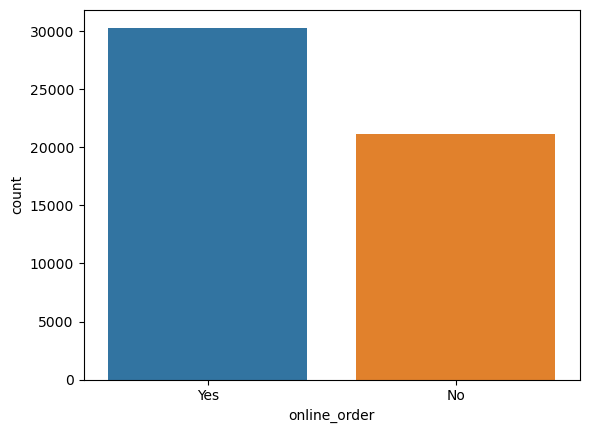

In [36]:
#Plotting graph for Restaurants delivering Online or not
sns.countplot(x="online_order",data=df)

<Axes: xlabel='book_table', ylabel='count'>

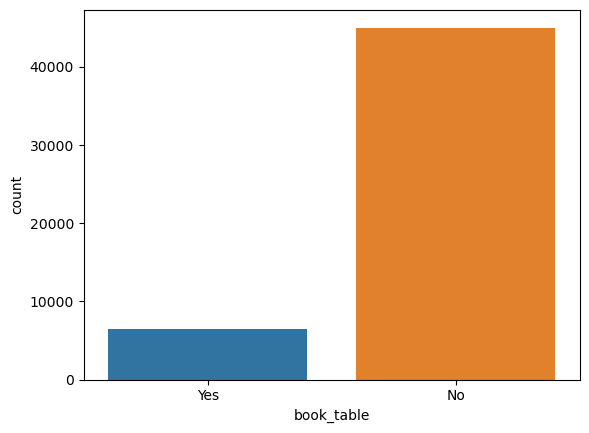

In [37]:
# Plotting graph for Restaurants allowing table booking or not
sns.countplot(x="book_table",data=df)

<Axes: xlabel='book_table', ylabel='rate'>

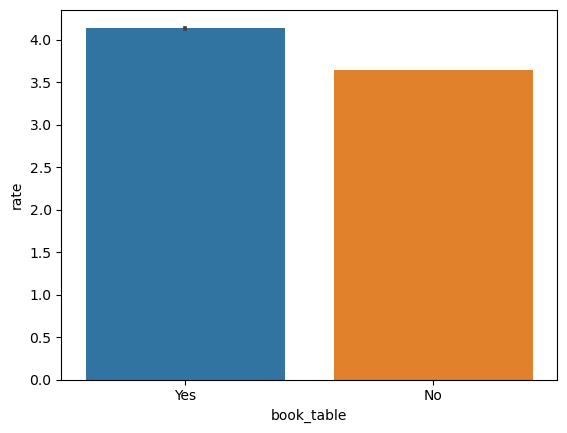

In [38]:
#plotting graph for Table booking Rate vs Rate
sns.barplot(x="book_table",y="rate",data=df)

<Axes: xlabel='rate', ylabel='location'>

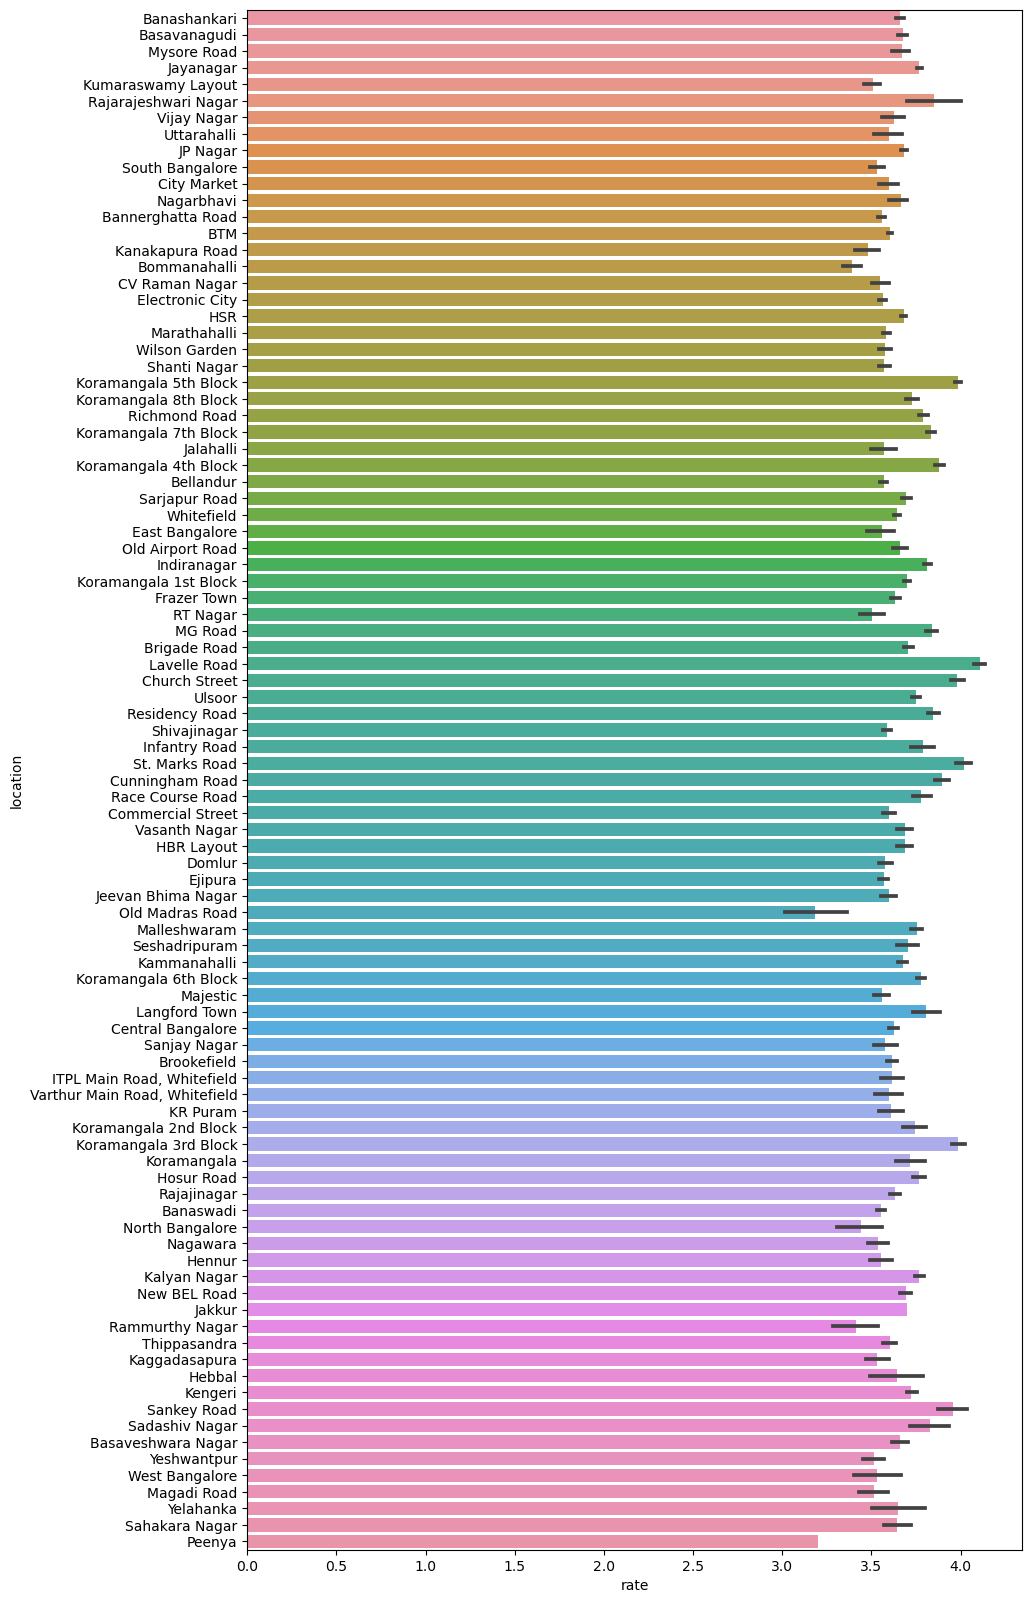

In [39]:
#Relation between Location and Rating
plt.figure(figsize=(10,20))

sns.barplot(y="location",x="rate",data=df)

<Axes: xlabel='count', ylabel='rest_type'>

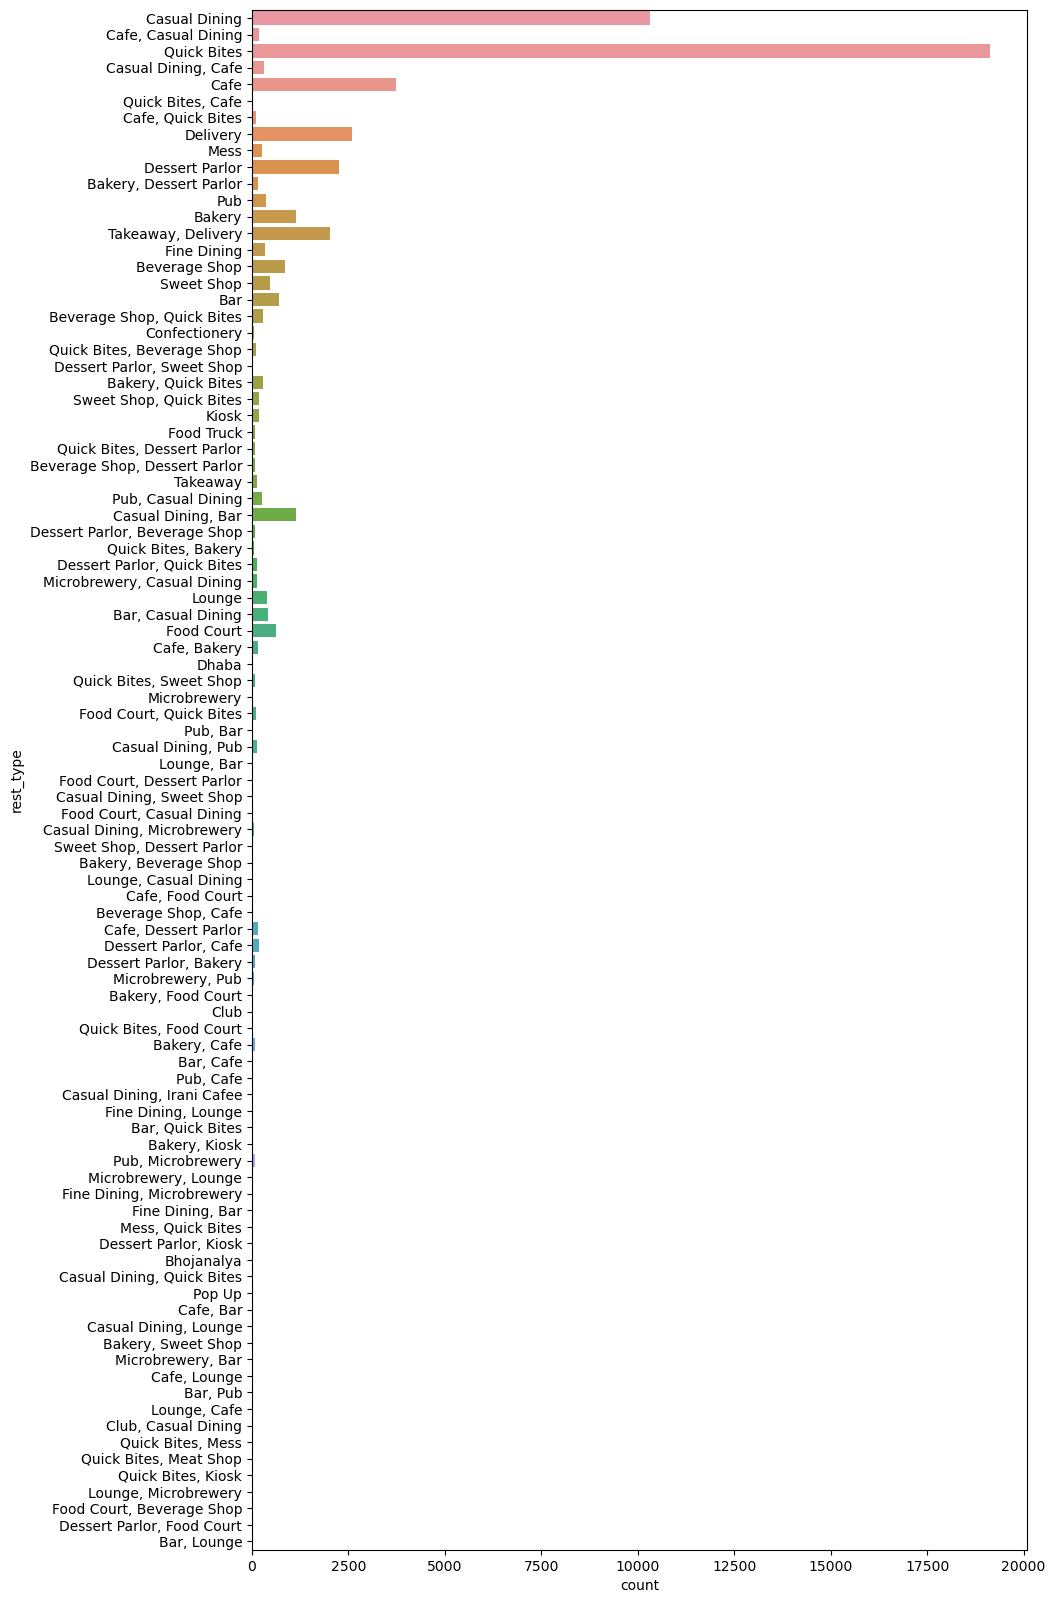

In [40]:
#Restaurant Type
plt.figure(figsize=(10,20))
sns.countplot(y="rest_type",data=df)

<Axes: xlabel='Services', ylabel='count'>

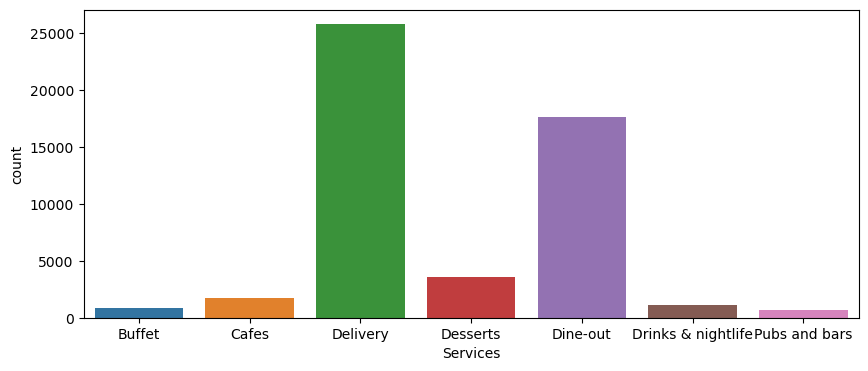

In [41]:
#Types of Services
plt.figure(figsize=(10,4))
sns.countplot(x="Services",data=df)

In [42]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'Cost', 'reviews_list', 'Services'],
      dtype='object')

Text(0.5, 1.0, 'No. of Restorents in perticular Location')

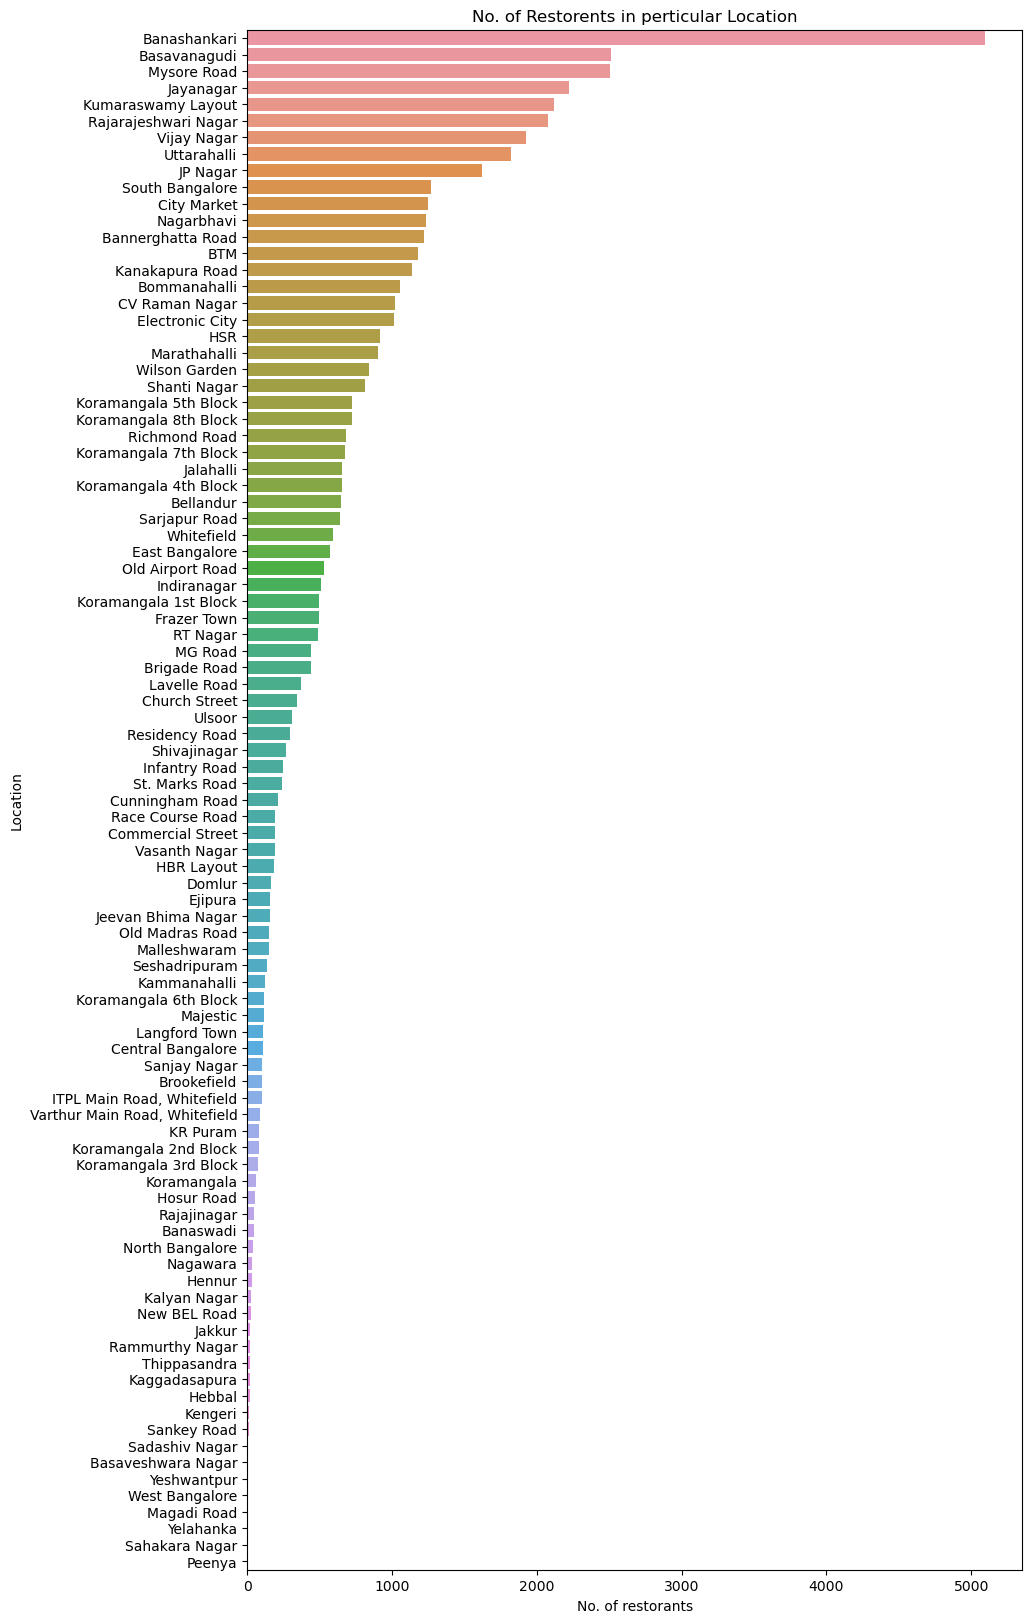

In [43]:
plt.figure(figsize=(10,20))
sns.barplot(df,x=list(df.location.value_counts()),y=df.location.unique())
plt.xlabel('No. of restorants')
plt.ylabel('Location')
plt.title('No. of Restorents in perticular Location')

In [44]:
df.cuisines.value_counts().head(10)

North Indian                           2899
North Indian, Chinese                  2361
South Indian                           1828
Biryani                                 909
Bakery, Desserts                        907
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  649
Name: cuisines, dtype: int64

In [45]:
df['location'].value_counts().head(10)

BTM                      5097
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Name: location, dtype: int64

In [46]:

# Get the top 10 most common locations
top_locations = df['location'].value_counts().head(10).index.tolist()

# Apply the filter using boolean indexing
filtered_df = df[df['location'].isin(top_locations)]

In [47]:
filtered_df.cuisines.value_counts().head(5)

North Indian             1407
North Indian, Chinese    1191
South Indian              628
Fast Food                 411
Bakery, Desserts          382
Name: cuisines, dtype: int64

Text(0.5, 1.0, 'Top 5 cuisenes in Top 5 Locations')

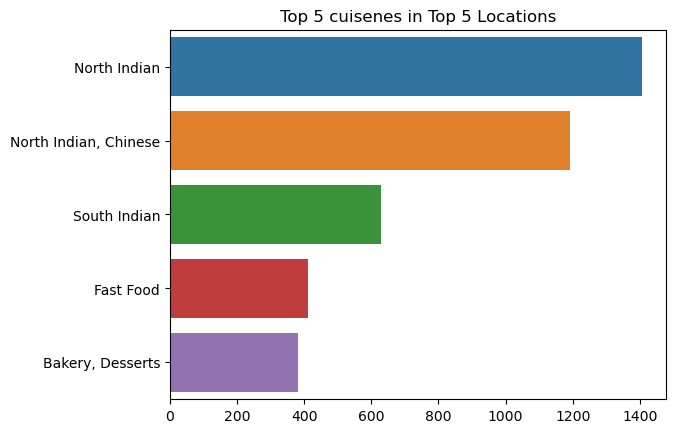

In [48]:

sns.barplot(df,x=list(filtered_df.cuisines.value_counts().head(5)),y=filtered_df.cuisines.value_counts().head(5).index.tolist())
plt.title('Top 5 cuisenes in Top 5 Locations')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51466 non-null  object 
 1   book_table    51466 non-null  object 
 2   rate          51466 non-null  float64
 3   votes         51466 non-null  int64  
 4   location      51466 non-null  object 
 5   rest_type     51466 non-null  object 
 6   cuisines      51466 non-null  object 
 7   Cost          51466 non-null  float64
 8   reviews_list  51466 non-null  object 
 9   Services      51466 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [50]:
# Create subsets based on online_order and book_table
online_order_subset = df[(df['online_order'] == 'Yes') & (df['book_table'] == 'Yes')]
no_online_order_subset = df[(df['online_order'] == 'No') & (df['book_table'] == 'No')]

In [51]:
# Calculate average ratings, average votes, and counts
online_order_avg_rating = online_order_subset['rate'].mean()
online_order_avg_votes = online_order_subset['votes'].mean()
online_order_count = len(online_order_subset)

In [52]:
no_online_order_avg_rating = no_online_order_subset['rate'].mean()
no_online_order_avg_votes = no_online_order_subset['votes'].mean()
no_online_order_count = len(no_online_order_subset)

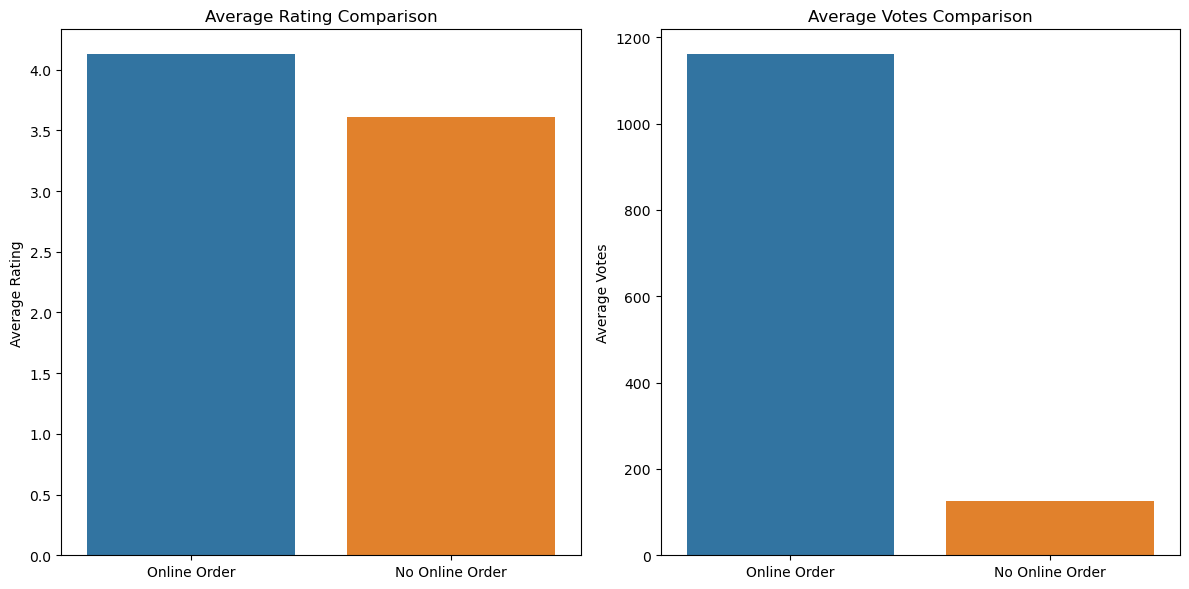

In [53]:
# Create two bar plots for Average Rating and Average Votes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['Online Order', 'No Online Order'], y=[online_order_avg_rating, no_online_order_avg_rating])
plt.title('Average Rating Comparison')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
sns.barplot(x=['Online Order', 'No Online Order'], y=[online_order_avg_votes, no_online_order_avg_votes])
plt.title('Average Votes Comparison')
plt.ylabel('Average Votes')

plt.tight_layout()

# Insights & Conclusion
    - Approximatelly 60% Restaurants at Bengaluru delivering Online
    - Restaurants delivering Online are high rated 
    - Most of the Restaurants at Bengaluru are QuickBites and Casual Dining
    - Dine Out and Delivery is most common services available
    - North Indian, South Inidan, Chinese are top sellers in top 10 locatins 
    - Restorents with online order and table booking are high rated and highly voted comparatively
    